## Investigating Effect of Chirp Mass / Waveform Duration on Fitting Algorithm for Eccentricity

Time til merger: (Maggiore eqn 4.21)

$$
\tau \simeq  2.18\,s\,\,\bigg(\frac{1.21\,M_\odot}{M_c}\bigg)^{5/3}\,\,\bigg(\frac{100\,Hz}{f_{GW}}\bigg)^{8/3}
$$

### Calculating component masses given chirp mass and total mass 

Definitions of chirp mass and total mass: 
$$
M_c = \frac{(m_1\,m_2)^{3/5}}{(m_1 + m_2)^{1/5}}
$$

$$
M_T = m_1 + m_2
$$

Therefore, 
$$
m_1 = \frac{1}{2}\big(\, M_T + \sqrt{{M_T}^2 - 4\,{M_T}^{1/3}\,{M_c}^{5/3}}  \,\big)
$$

$$
m_1 = \frac{1}{2}\big(\, M_T - \sqrt{{M_T}^2 - 4\,{M_T}^{1/3}\,{M_c}^{5/3}}  \,\big)
$$

In [1]:
%%capture output
%run spectrogram_gne_functions.ipynb

### Functions

In [2]:
# Function to find componenent masses from total mass (Mt) and chirp mass (Mc)
def findComponentMasses(Mt, Mc): 
    m1 = 0.5*(Mt + np.sqrt(Mt**2 - 4*Mt**(1.0/3)*Mc**(5.0/3)))
    m2 = 0.5*(Mt - np.sqrt(Mt**2 - 4*Mt**(1.0/3)*Mc**(5.0/3)))
    return (m1,m2)

In [3]:
# Function to max possible chirp mass for an binary (equal mass binary) given 
# total mass
def findMaxChirpMass(Mt): 
    m = Mt/2.0
    Mc = ((m**2)**(3.0/5))/((2*m)**(1.0/5))
    return Mc

In [4]:
# Function to calculate time til merger given chirp mass (Mc) and gravitational
# wave frequency (fGW)
def timeTilMerger(Mc, fGW):
    tau = 2.18*(1.21/Mc)**(5.0/3)*(100.0/fGW)**(8.0/3)
    return tau

In [5]:
# Testing 
print findComponentMasses(10, 2)
print findMaxChirpMass(10)
print findComponentMasses(10, findMaxChirpMass(10))
print timeTilMerger(findMaxChirpMass(10),100)
print timeTilMerger(findMaxChirpMass(5),100)
print timeTilMerger(findMaxChirpMass(4),100)

(9.2614664393015254, 0.73853356069847553)
4.35275281648
(5.0000000596046448, 4.9999999403953552)
0.258122246048
0.819487049825
1.18866310617


### Determining Parameter Space

In [5]:
# Parameters of system
#Mtot = [4,5,6,7,8,9,10] # total mass
Mtot = [3.7,3.8,3.9,4,4.1,4.2,4.3,4.4]
Mc = [0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6] # chirp masses
e0 = [0.1, 0.3, 0.5] # initial eccentricities

for tot in Mtot: 
    for chirp in Mc: 
        m1, m2 = findComponentMasses(tot, chirp)
        print "total mass = {}  chirp mass = {} component masses = {}, {}".format(tot,chirp,m1,m2) 
        
# Parameters for spectrogram: 
theta = 0 
fftlen = 1
nMax = 15
returnAll = False

total mass = 3.7  chirp mass = 0.9 component masses = 3.30770648825, 0.392293511745
total mass = 3.7  chirp mass = 1.0 component masses = 3.21960564625, 0.480394353754
total mass = 3.7  chirp mass = 1.1 component masses = 3.11867621069, 0.581323789314
total mass = 3.7  chirp mass = 1.2 component masses = 3.00178382611, 0.69821617389
total mass = 3.7  chirp mass = 1.3 component masses = 2.86365499451, 0.836345005491
total mass = 3.7  chirp mass = 1.4 component masses = 2.6941784258, 1.0058215742
total mass = 3.7  chirp mass = 1.5 component masses = 2.46839553737, 1.23160446263
total mass = 3.7  chirp mass = 1.6 component masses = 2.04280460958, 1.65719539042
total mass = 3.8  chirp mass = 0.9 component masses = 3.41684605409, 0.383153945905
total mass = 3.8  chirp mass = 1.0 component masses = 3.33161071849, 0.468389281511
total mass = 3.8  chirp mass = 1.1 component masses = 3.23448541474, 0.565514585261
total mass = 3.8  chirp mass = 1.2 component masses = 3.12286207416, 0.67713792583

### Looking at Power Distribution Curves

In [6]:
# Smaller set of parameters 
Mtot_select = [4, 8]
Mchirp_select = [0.5, findMaxChirpMass(4)]

for mt in Mtot_select: 
    for mc in Mchirp_select: 
        
        m1, m2 = findComponentMasses(mt, mc)
        eta = (1.0*(m1*m2))/((m1 + m2)**2.0)
        
        print "total mass = {}     chirp mass = {}     m1 = {}  m2 = {}   eta = {}".format(mt, np.round(mc,1), np.round(m1,2), np.round(m2,2), eta)

total mass = 4     chirp mass = 0.5     m1 = 3.87  m2 = 0.13   eta = 0.03125
total mass = 4     chirp mass = 1.7     m1 = 2.0  m2 = 2.0   eta = 0.25
total mass = 8     chirp mass = 0.5     m1 = 7.92  m2 = 0.08   eta = 0.0098431332023
total mass = 8     chirp mass = 1.7     m1 = 7.31  m2 = 0.69   eta = 0.0787450656184


In [7]:
# Theoretical power distributions

g_theoretical = {}

for e in e0: 
    n,g_theo = gDist(nMax,e)
    g_theoretical[e] = g_theo

In [8]:
# Experimental power distributions with different mass parameters
# Key format = (e, mt, mc)

g_experimental = {}

for e in e0:
    for mt in Mtot_select:
        for mc in Mchirp_select:
        
            # Component masses
            m1, m2 = findComponentMasses(mt, mc)

            g_exp, n = genPowerDistFromSpec(e, m1, m2, theta, fftlen, nMax)

            key = (e,mt,mc)  
            g_experimental[key] = g_exp
        
            print "Finished job for e={}, mt={}, mc={}".format(e,mt,mc)

Finished job for e=0.1, mt=4, mc=0.5
Finished job for e=0.1, mt=4, mc=1.74110112659
Finished job for e=0.1, mt=8, mc=0.5
Finished job for e=0.1, mt=8, mc=1.74110112659
Finished job for e=0.3, mt=4, mc=0.5
Finished job for e=0.3, mt=4, mc=1.74110112659
Finished job for e=0.3, mt=8, mc=0.5
Finished job for e=0.3, mt=8, mc=1.74110112659
Finished job for e=0.5, mt=4, mc=0.5
Finished job for e=0.5, mt=4, mc=1.74110112659
Finished job for e=0.5, mt=8, mc=0.5
Finished job for e=0.5, mt=8, mc=1.74110112659


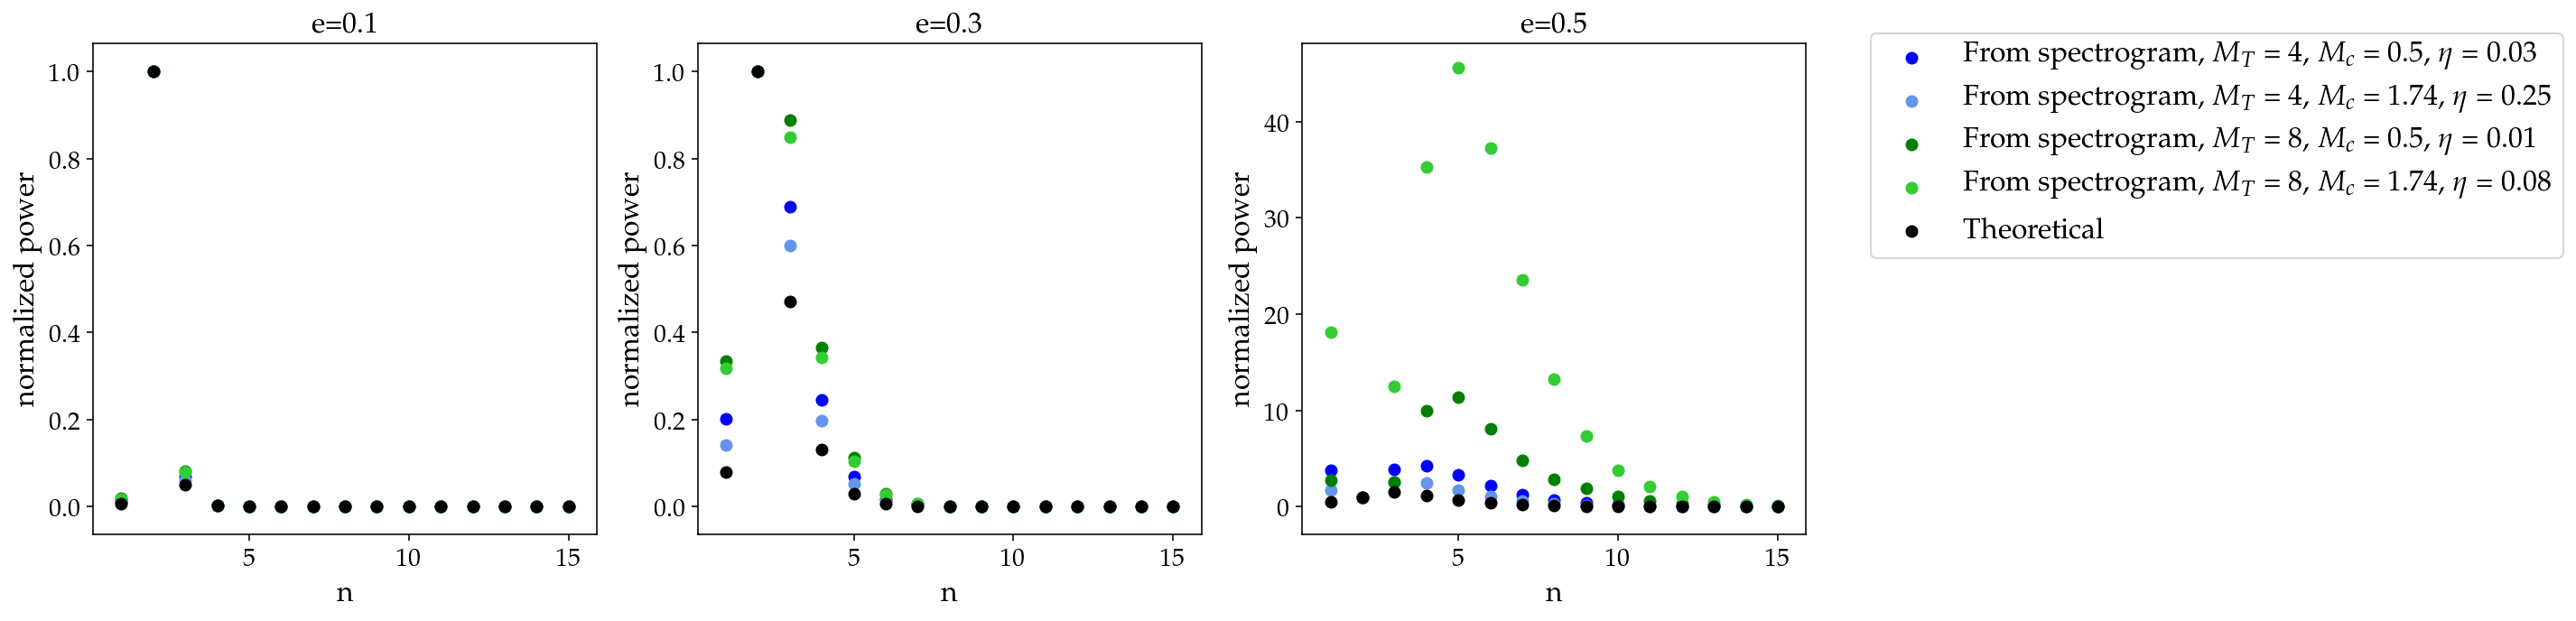

In [9]:
# Plotting 

colors = ['blue', 'cornflowerblue', 'green', 'limegreen']

plt.figure(figsize=(17,5))
i = 1;
for e in e0:
    
    g_theo = g_theoretical[e]
    
    plt.subplot(1,3,i)
    
    c=0; 
    
    for mt in Mtot_select:
        for mc in Mchirp_select:
            key = (e,mt,mc)
            g_exp = g_experimental[key]
            eta = np.round((mc/mt)**(5.0/3),2)
            plt.scatter(n, g_exp, color=colors[c], label=r'From spectrogram, $M_T$ = {}, $M_c$ = {}, $\eta$ = {}'.format(mt, np.round(mc,2),eta))
            c = c+1; 
            
    plt.scatter(n, g_theo, label='Theoretical', color='k')

    plt.title("e={}".format(e), fontsize=16)
    plt.xlabel("n", fontsize=16)
    plt.ylabel("normalized power", fontsize=16)
    
    i = i + 1

plt.legend(bbox_to_anchor=(1.1, 1.05), fontsize=16)

### Curve Fitting

In [10]:
print "Mtot\tMchirp\te Inj\te Fit"

for e_inj in e0: 
    for tot in Mtot: 
        for chirp in Mc: 
            
            # Finding component masses for given total mass and chirp mass
            m1, m2 = findComponentMasses(tot, chirp)
            
            # Finding best fit eccentricity
            e_fit = bestFitEccMaggiore(e_inj, m1, m2, fftlen, nMax, returnAll)
            
            print "{}\t{}\t{}\t{}".format(tot,chirp,e_inj,e_fit)

Mtot	Mchirp	e Inj	e Fit
3.7	0.9	0.1	0.114687808552
3.7	1.0	0.1	0.114413463543
3.7	1.1	0.1	0.114096275048
3.7	1.2	0.1	0.113724912772
3.7	1.3	0.1	0.113280286576
3.7	1.4	0.1	0.112725678456
3.7	1.5	0.1	0.111970038589
3.7	1.6	0.1	0.110486173035
3.8	0.9	0.1	0.115024509838
3.8	1.0	0.1	0.114761849555
3.8	1.1	0.1	0.114459962101
3.8	1.2	0.1	0.11410949266
3.8	1.3	0.1	0.113695309537
3.8	1.4	0.1	0.113190214823
3.8	1.5	0.1	0.112535284576
3.8	1.6	0.1	0.111534375538
3.9	0.9	0.1	0.115356101125
3.9	1.0	0.1	0.115104064122
3.9	1.1	0.1	0.11481587556
3.9	1.2	0.1	0.114483707832
3.9	1.3	0.1	0.114095321123
3.9	1.4	0.1	0.113629865958
3.9	1.5	0.1	0.113046336972
3.9	1.6	0.1	0.112237735526
4	0.9	0.1	0.115682921871
4	1.0	0.1	0.115440596943
4	1.1	0.1	0.115164765008
4	1.2	0.1	0.114848801132
4	1.3	0.1	0.114482637088
4	1.4	0.1	0.114049855118
4	1.5	0.1	0.11352044798
4	1.6	0.1	0.112827133643
4.1	0.9	0.1	0.116005267759
4.1	1.0	0.1	0.115771865925
4.1	1.1	0.1	0.115507252986
4.1	1.2	0.1	0.115205766282
4.1	1.3	0.1	0.114859006

## Loading + Plotting Data 

### First Data Set 

In [35]:
# Load first data set
Mtot_array, Mchirp_array, e_inj_array, e_fit_array = np.loadtxt('Waveform_duration_investigation_data.txt',skiprows=1,usecols=(0,1,2,3),unpack=True)

In [36]:
e_diff_1 = []
e_diff_2 = []
e_diff_3 = []

for i,e_inj in enumerate(e_inj_array): 
    e_fit = e_fit_array[i]
    
    # Just difference
    #diff = e_fit-e_inj
    
    # Percent difference
    diff = (np.abs(e_fit - e_inj)/e_inj)*100
    
    if e_inj==0.1:
        e_diff_1.append(diff)
    if e_inj==0.3:
        e_diff_2.append(diff)
    if e_inj==0.5:
        e_diff_3.append(diff)
        

print len(e_diff_1), len(e_diff_2), len(e_diff_3)

56 56 56


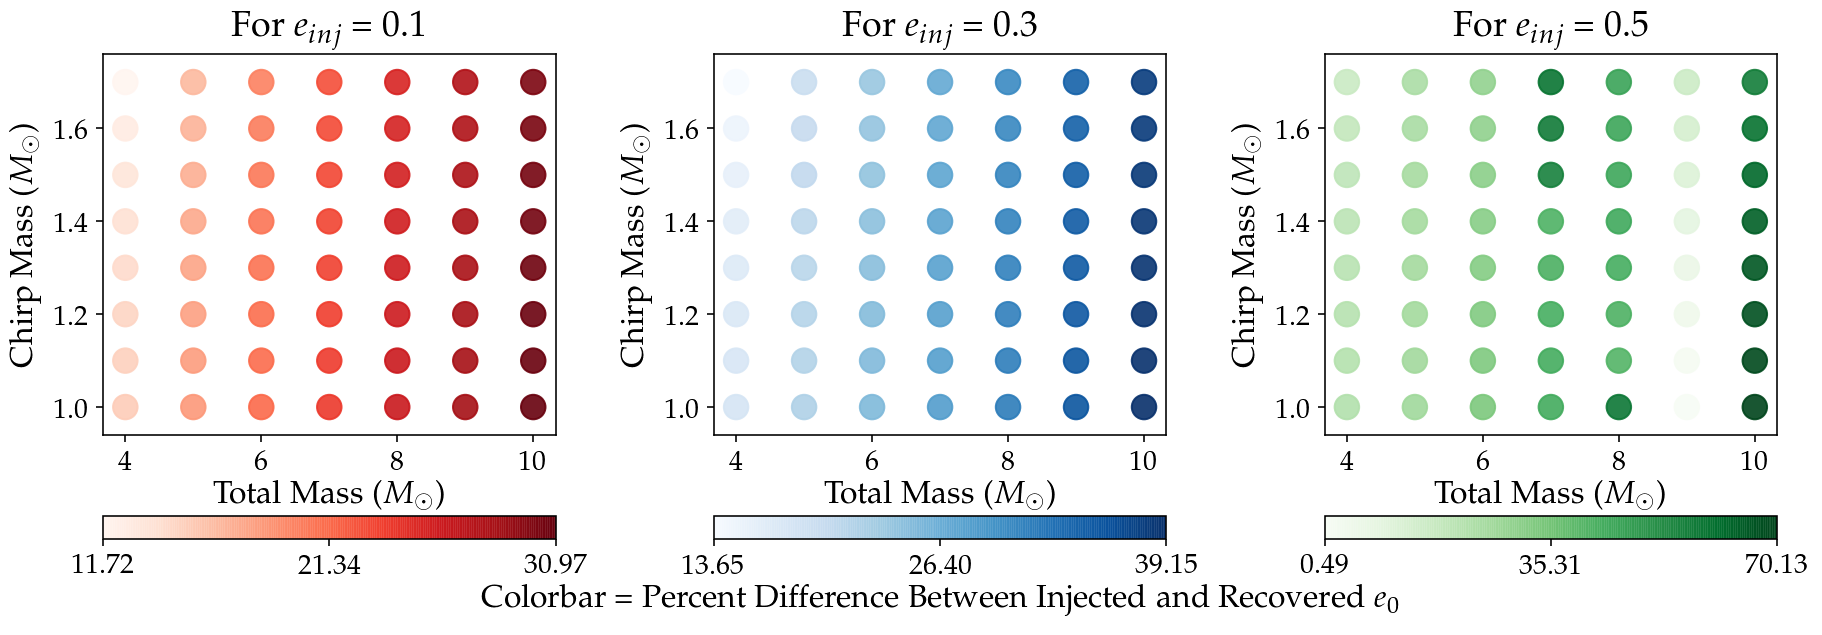

In [37]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(Mtot_array[0:len(e_diff_1)], Mchirp_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[0].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(Mtot_array[len(e_diff_1):len(e_diff_1)*2], Mchirp_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[1].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(Mtot_array[len(e_diff_1)*2:len(e_diff_1)*3], Mchirp_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[2].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)

In [42]:
eta_array = []

for i,Mt in enumerate(Mtot_array): 
    Mc = Mchirp_array[i]
    eta = (Mc/Mt)**(5.0/3)
    eta_array.append(eta)

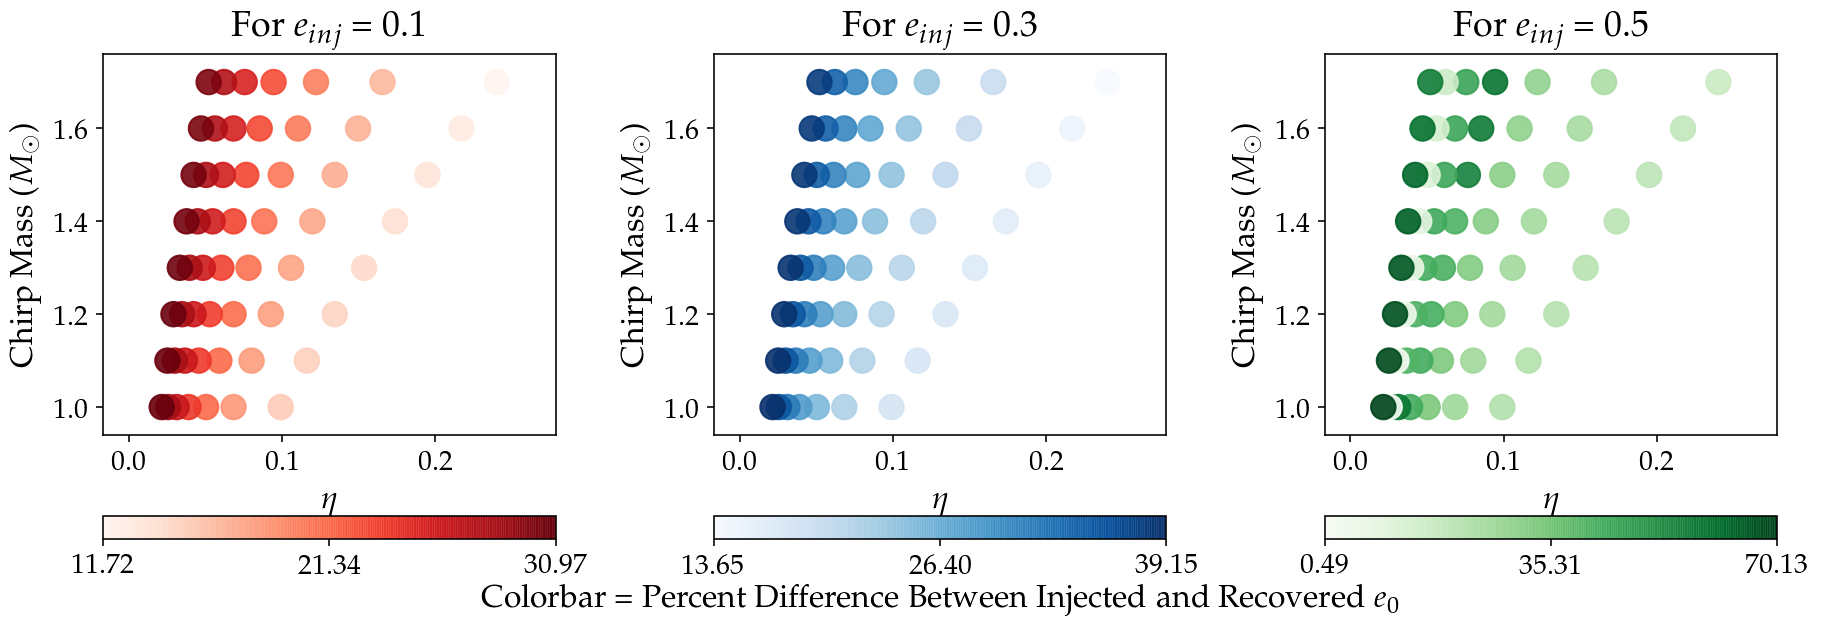

In [45]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(eta_array[0:len(e_diff_1)], Mchirp_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"$\eta$", fontsize=16)
axes[0].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(eta_array[len(e_diff_1):len(e_diff_1)*2], Mchirp_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"$\eta$", fontsize=16)
axes[1].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(eta_array[len(e_diff_1)*2:len(e_diff_1)*3], Mchirp_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"$\eta$", fontsize=16)
axes[2].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)

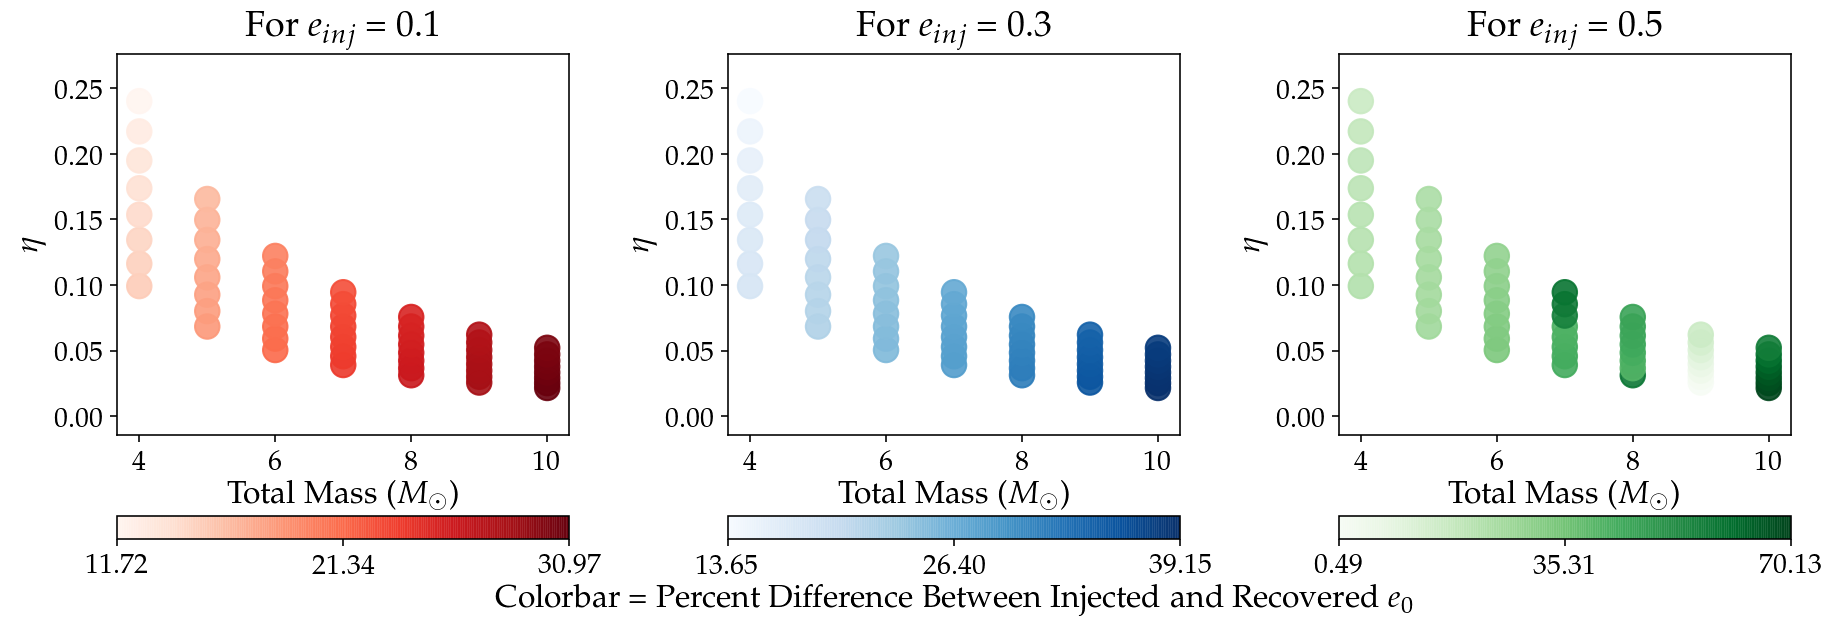

In [46]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(Mtot_array[0:len(e_diff_1)], eta_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[0].set_ylabel(r"$\eta$", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(Mtot_array[len(e_diff_1):len(e_diff_1)*2], eta_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[1].set_ylabel(r"$\eta$", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(Mtot_array[len(e_diff_1)*2:len(e_diff_1)*3], eta_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[2].set_ylabel(r"$\eta$", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)

### Second Data Set

In [47]:
# Load second data set
Mtot_array, Mchirp_array, e_inj_array, e_fit_array = np.loadtxt('Waveform_duration_investigation_data_2.txt',skiprows=1,usecols=(0,1,2,3),unpack=True)

In [48]:
e_diff_1 = []
e_diff_2 = []
e_diff_3 = []

for i,e_inj in enumerate(e_inj_array): 
    e_fit = e_fit_array[i]
    
    # Just difference
    #diff = e_fit-e_inj
    
    # Percent difference
    diff = (np.abs(e_fit - e_inj)/e_inj)*100
    
    if e_inj==0.1:
        e_diff_1.append(diff)
    if e_inj==0.3:
        e_diff_2.append(diff)
    if e_inj==0.5:
        e_diff_3.append(diff)
        

print len(e_diff_1), len(e_diff_2), len(e_diff_3)

64 64 64


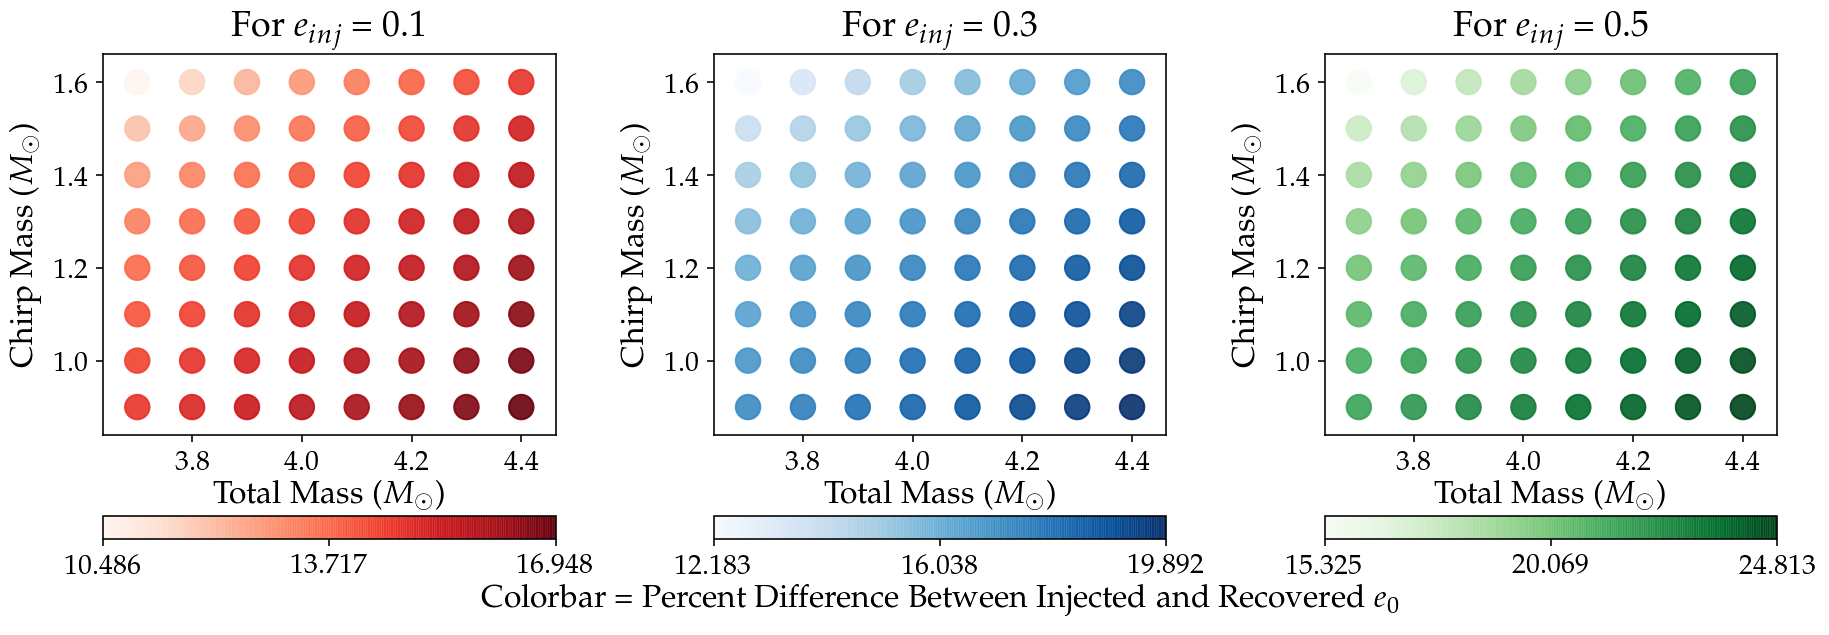

In [49]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(Mtot_array[0:len(e_diff_1)], Mchirp_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[0].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(Mtot_array[len(e_diff_1):len(e_diff_1)*2], Mchirp_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[1].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(Mtot_array[len(e_diff_1)*2:len(e_diff_1)*3], Mchirp_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[2].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)

In [50]:
eta_array = []

for i,Mt in enumerate(Mtot_array): 
    Mc = Mchirp_array[i]
    eta = (Mc/Mt)**(5.0/3)
    eta_array.append(eta)

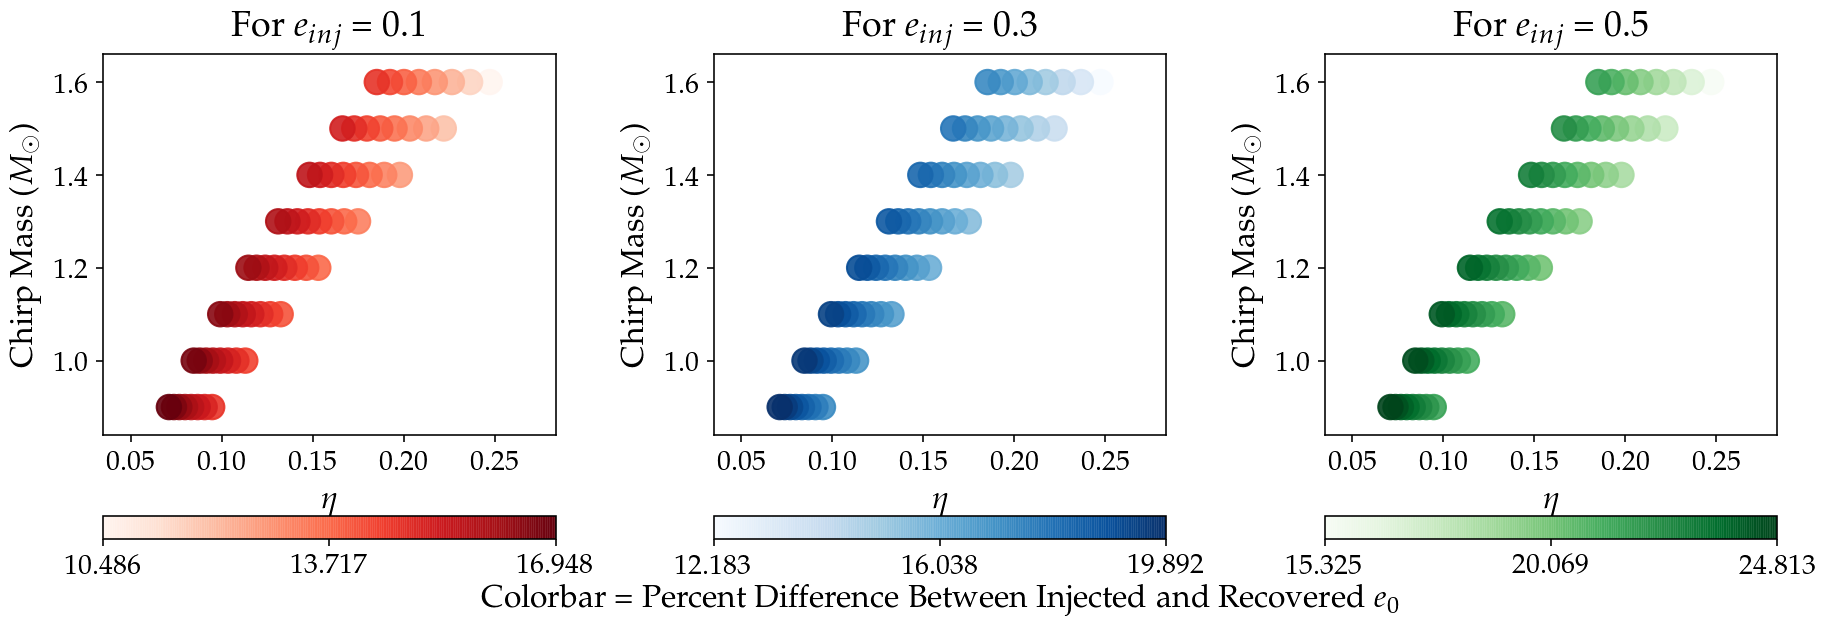

In [51]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(eta_array[0:len(e_diff_1)], Mchirp_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"$\eta$", fontsize=16)
axes[0].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(eta_array[len(e_diff_1):len(e_diff_1)*2], Mchirp_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"$\eta$", fontsize=16)
axes[1].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(eta_array[len(e_diff_1)*2:len(e_diff_1)*3], Mchirp_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"$\eta$", fontsize=16)
axes[2].set_ylabel(r"Chirp Mass ($M_{\odot}$)", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)

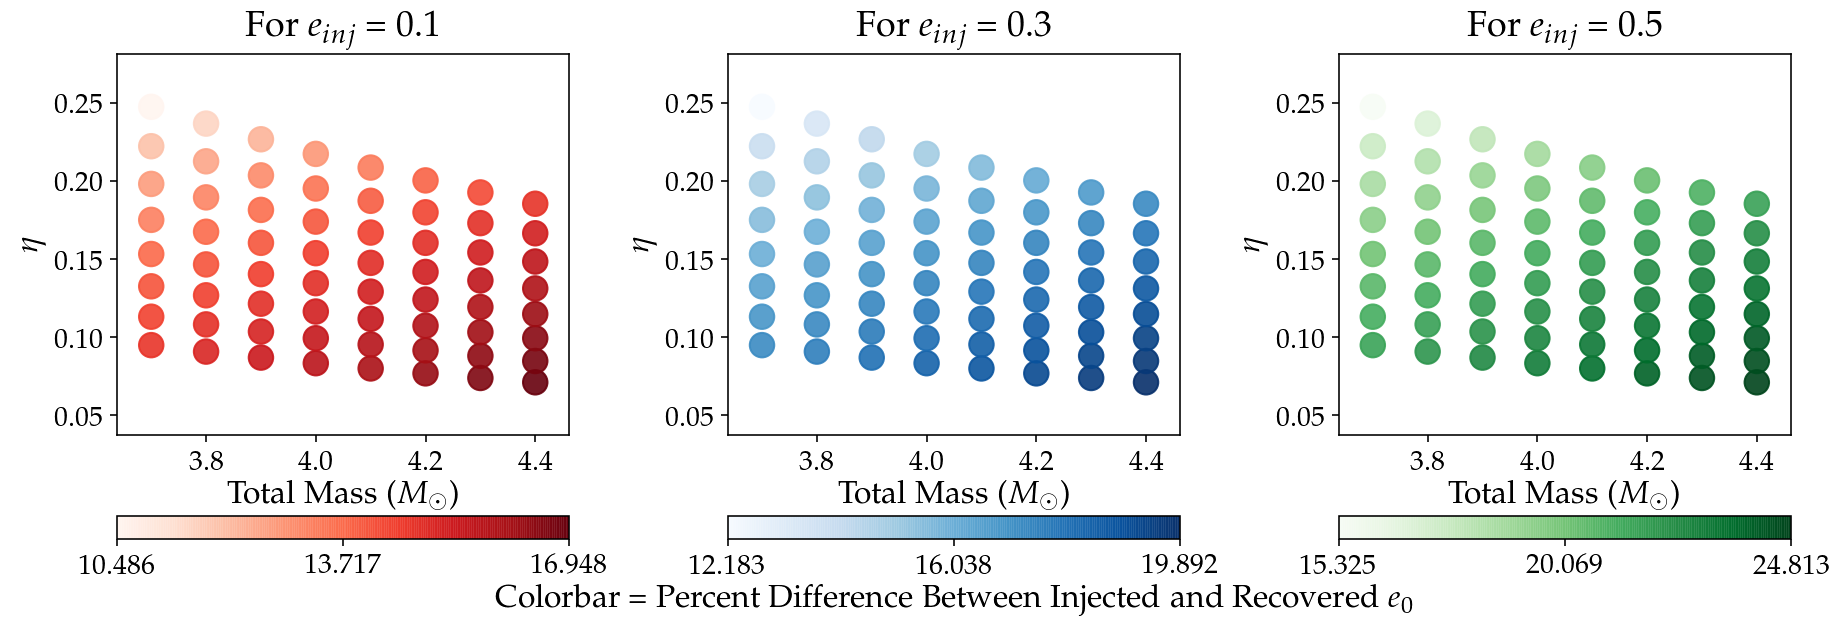

In [52]:
fig = plt.figure(figsize=(15,5))
axes = fig.subplots(nrows=1, ncols=3)

ax1 = axes[0].scatter(Mtot_array[0:len(e_diff_1)], eta_array[0:len(e_diff_1)], c=e_diff_1, cmap='Reds', s=150, alpha=0.9)
axes[0].set_title(r"For $e_{inj}$ = 0.1", fontsize=18)
axes[0].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[0].set_ylabel(r"$\eta$", fontsize=16)
cb1 = plt.colorbar(ax1, ax=axes[0], orientation = 'horizontal', ticks=[min(e_diff_1), (min(e_diff_1)+max(e_diff_1))/2, max(e_diff_1)])

ax2 = axes[1].scatter(Mtot_array[len(e_diff_1):len(e_diff_1)*2], eta_array[len(e_diff_1):len(e_diff_1)*2], c=e_diff_2, cmap='Blues', s=150, alpha=0.9)
axes[1].set_title(r"For $e_{inj}$ = 0.3", fontsize=18)
axes[1].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[1].set_ylabel(r"$\eta$", fontsize=16)
cb2 = plt.colorbar(ax2, ax=axes[1], orientation = 'horizontal',ticks=[min(e_diff_2), (min(e_diff_2)+max(e_diff_2))/2, max(e_diff_2)])
cb2.set_label(label=r"Colorbar = Percent Difference Between Injected and Recovered $e_0$",fontsize=16)

ax3 = axes[2].scatter(Mtot_array[len(e_diff_1)*2:len(e_diff_1)*3], eta_array[len(e_diff_1)*2:len(e_diff_1)*3], c=e_diff_3, cmap='Greens', s=150, alpha=0.9)
axes[2].set_title(r"For $e_{inj}$ = 0.5", fontsize=18)
axes[2].set_xlabel(r"Total Mass ($M_{\odot}$)", fontsize=16)
axes[2].set_ylabel(r"$\eta$", fontsize=16)
cb3 = plt.colorbar(ax3, ax=axes[2], orientation = 'horizontal', ticks=[min(e_diff_3), (min(e_diff_3)+max(e_diff_3))/2, max(e_diff_3)])

fig.subplots_adjust(wspace=0.35,hspace=0.35)